In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score, recall_score, roc_curve, roc_auc_score

In [2]:
dat = pd.read_csv("D:\\BDA project\\BDA\\default of credit card clients.csv")

In [3]:
dat.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


Text(0.5, 1.0, 'Credit Card Default Counts')

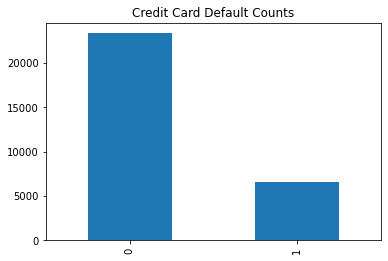

In [4]:
pd.value_counts(dat['default payment next month']).plot.bar()
plt.title("Credit Card Default Counts")

In [5]:
print(dat['LIMIT_BAL'].value_counts().nlargest(5))
print('\nNANs found:', sum(dat['LIMIT_BAL']==0) )

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

NANs found: 0


In [6]:

print ("Gender: ")
print(dat['SEX'].value_counts()) 
print('NANs found: ', sum(dat['SEX']==0))

Gender: 
2    18112
1    11888
Name: SEX, dtype: int64
NANs found:  0


In [7]:

print(dat['EDUCATION'].value_counts())
print('NANs found:', sum(dat['EDUCATION']==0) )

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
NANs found: 14


In [8]:
print(dat['MARRIAGE'].value_counts())
print('NANs found:', sum(dat['MARRIAGE']==0) )

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
NANs found: 54


29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
Name: AGE, dtype: int64
NANs found: 0


Text(0.5, 1.0, 'Age Distribution')

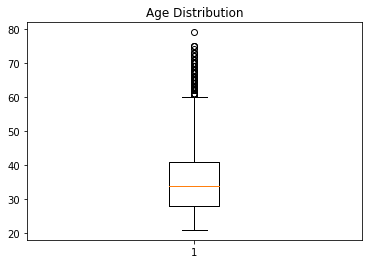

In [9]:
print(dat['AGE'].value_counts().nlargest(10))
print('NANs found:', sum(dat['AGE']==0)) 
plt.boxplot(dat['AGE']) 
plt.title("Age Distribution")

0       5249
2000    1363
3000     891
5000     698
1500     507
Name: PAY_AMT1, dtype: int64


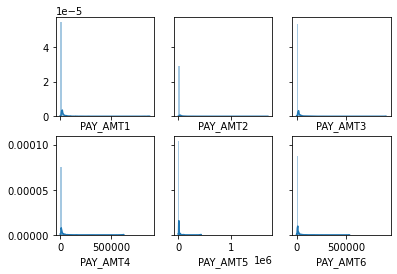

In [10]:
print(dat['PAY_AMT1'].value_counts().nlargest(5))
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.distplot(dat['PAY_AMT1'], ax=ax[0,0])
sns.distplot(dat['PAY_AMT2'], ax=ax[0,1])
sns.distplot(dat['PAY_AMT3'], ax=ax[0,2])
sns.distplot(dat['PAY_AMT4'], ax=ax[1,0])
sns.distplot(dat['PAY_AMT5'], ax=ax[1,1])
sns.distplot(dat['PAY_AMT6'], ax=ax[1,2])


 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


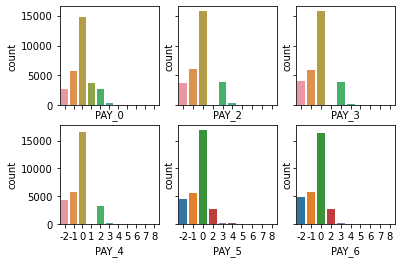

In [11]:
print(dat['PAY_0'].value_counts())
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.countplot(x="PAY_0", data=dat, ax=ax[0,0])
sns.countplot(x="PAY_2", data=dat, ax=ax[0,1])
sns.countplot(x="PAY_3", data=dat, ax=ax[0,2])
sns.countplot(x="PAY_4", data=dat, ax=ax[1,0])
sns.countplot(x="PAY_5", data=dat, ax=ax[1,1])
sns.countplot(x="PAY_6", data=dat, ax=ax[1,2])

0      2008
390     244
780      76
326      72
316      63
Name: BILL_AMT1, dtype: int64


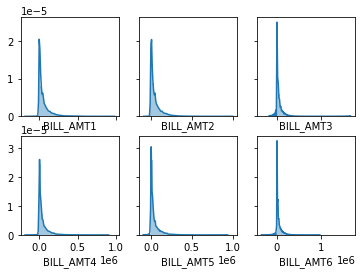

In [12]:
print(dat['BILL_AMT1'].value_counts().nlargest(5))
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
sns.distplot(dat['BILL_AMT1'], ax=ax[0,0])
sns.distplot(dat['BILL_AMT2'], ax=ax[0,1])
sns.distplot(dat['BILL_AMT3'], ax=ax[0,2])
sns.distplot(dat['BILL_AMT4'], ax=ax[1,0])
sns.distplot(dat['BILL_AMT5'], ax=ax[1,1])
sns.distplot(dat['BILL_AMT6'], ax=ax[1,2])

Text(0.5, 1.0, 'Default by Education and Sex')

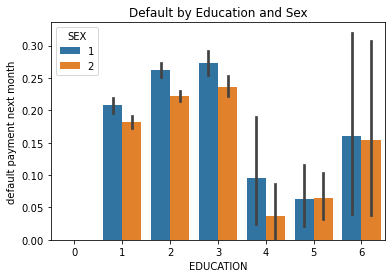

In [13]:
dat['default payment next month'].value_counts()
sns.barplot(x="EDUCATION", y="default payment next month", hue="SEX", data=dat)
plt.title("Default by Education and Sex")

In [14]:
Y = dat.iloc[:,-1]

In [15]:
X = dat.iloc[:, 1:-1]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from time import *
start_time = time()
clf = RandomForestClassifier(n_estimators=300,max_features='auto',max_depth=4,random_state=13579,max_leaf_nodes=32)
clf.fit(X_train, Y_train)
end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)
preds = clf.predict(X_test)

Time to train model: 4.451 seconds


In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,preds))

0.8061111111111111


In [19]:
                                #SVM

In [20]:
from sklearn.svm import SVC
from time import *
start_time = time()
svl = SVC()
svl.fit(X_train,Y_train)
end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)

Time to train model: 15.919 seconds


In [21]:
y_pred = svl.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(Y_test,y_pred))

0.7733333333333333


In [23]:
                                #GB

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from time import *
start_time = time()
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
end_time = time()
elapsed_time = end_time - start_time
print("Time to train model: %.3f seconds" % elapsed_time)

Time to train model: 7.698 seconds


In [25]:
pred = gbc.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(Y_test,pred))

0.8125555555555556


In [27]:
client_data = [20000,2,2,1,39,2,4,5,9,7,8,890,316,316,1023,632,567,0,316,0,0,56,0]
data= np.array(list(client_data)).reshape(1,-1)


In [28]:
client_data2 = [50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000]
data2= np.array(list(client_data2)).reshape(1,-1)


In [29]:
clf.predict(data)
if clf.predict(data)[0] == 1:
    print("the customer is default")
else:
    print("Not default")


the customer is default


In [30]:
clf.predict(data2)
if clf.predict(data2)[0] == 1:
    print("the customer is default")
else:
    print("Not default")


Not default


In [31]:
svl.predict(data)
if svl.predict(data)[0] == 1:
    print("the customer is default")
else:
    print("Not default")


Not default


In [32]:
svl.predict(data2)
if svl.predict(data2)[0] == 1:
    print("the customer is default")
else:
    print("Not default")


Not default


In [33]:
gbc.predict(data)
if gbc.predict(data)[0] == 1:
    print("the customer is default")
else:
    print("Not default")


the customer is default


In [34]:
gbc.predict(data2)
if gbc.predict(data2)[0] == 1:
    print("the customer is default")
else:
    print("Not default")


Not default


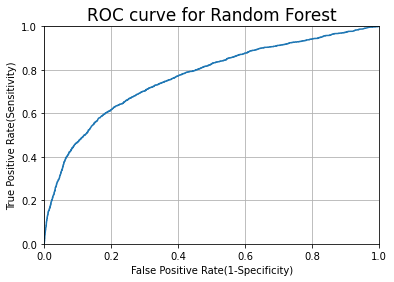

In [35]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr,trp,thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot(fpr,trp)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=14
plt.title('ROC curve for Random Forest')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)


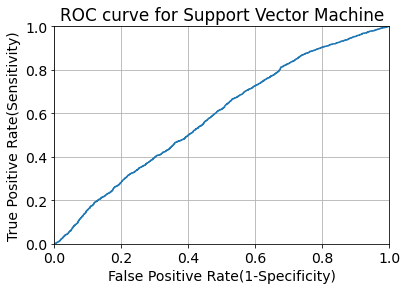

In [36]:
svl = SVC(probability = True)
svl.fit(X_train,Y_train)
y_pred_prob = svl.predict_proba(X_test)[:,1]
fpr,trp,thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot(fpr,trp)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=14
plt.title('ROC curve for Support Vector Machine')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)


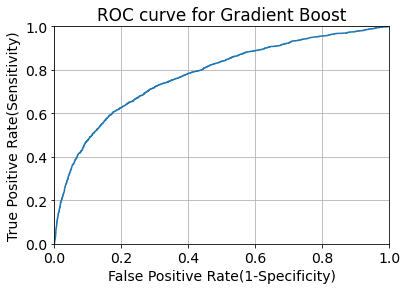

In [37]:
y_pred_prob = gbc.predict_proba(X_test)[:,1]
fpr,trp,thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot(fpr,trp)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.rcParams['font.size']=14
plt.title('ROC curve for Gradient Boost')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.grid(True)



In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
pickle.dump(clf, open('model.pkl','wb'))

In [49]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000]]))

[0]
